In [ ]:
# import os
# import numpy as np
# from resemblyzer import VoiceEncoder, preprocess_wav
# from sklearn.linear_model import LogisticRegression
# import joblib

# # 1) Инициализируем энкодер
# encoder = VoiceEncoder()

# def get_emb(path):
#     wav = preprocess_wav(path)
#     return encoder.embed_utterance(wav)

# # 2) Собираем X, y
# X, y = [], []
# for label in os.listdir("data_dir"):   
#     print(label)
#     folder = os.path.join("data_dir", label)
#     if not os.path.isdir(folder): continue
#     for fn in os.listdir(folder):
#         if not fn.endswith(".wav"): continue
#         emb = get_emb(os.path.join(folder, fn))
#         X.append(emb)
#         y.append(label)
# print(y)
# X = np.vstack(X)

# # 3) Обучаем логистическую регрессию
# clf = LogisticRegression(max_iter=1000)
# clf.fit(X, y)
# joblib.dump(clf, "speaker_clf.joblib")
# print("Модель сохранена в speaker_clf.joblib")

C:\Users\semen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\resemblyzer\voice_encoder.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any is

Loaded the voice encoder model on cuda in 0.20 seconds.
admin
other
['admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other']
Модель сохранена в speaker_clf.joblib


Loaded the voice encoder model on cuda in 0.01 seconds.
admin
other
['admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'admin', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other']


C:\Users\semen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\semen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\semen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\User

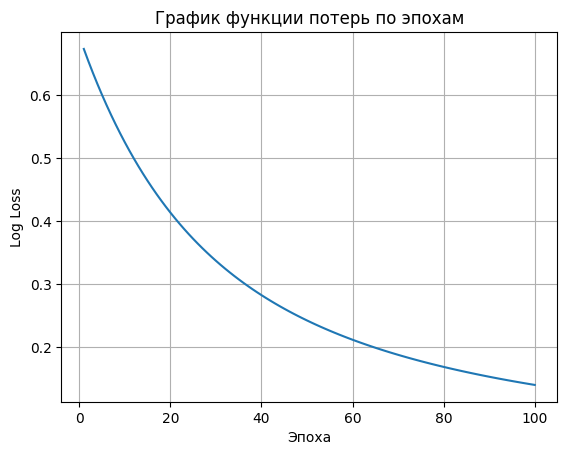

AttributeError: 'SGDClassifier' object has no attribute 'loss_curve_'

In [4]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt


import os
import numpy as np
from resemblyzer import VoiceEncoder, preprocess_wav
from sklearn.linear_model import LogisticRegression
import joblib

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# 1) Инициализируем энкодер
encoder = VoiceEncoder()

def get_emb(path):
    wav = preprocess_wav(path)
    return encoder.embed_utterance(wav)

# 2) Собираем X, y
X, y = [], []
for label in os.listdir("data_dir"):   
    print(label)
    folder = os.path.join("data_dir", label)
    if not os.path.isdir(folder): continue
    for fn in os.listdir(folder):
        if not fn.endswith(".wav"): continue
        emb = get_emb(os.path.join(folder, fn))
        X.append(emb)
        y.append(label)
print(y)
X = np.vstack(X)


clf = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True, learning_rate='constant', eta0=0.01, random_state=42)

n_epochs = 100
log_losses = []

for epoch in range(n_epochs):
    clf.fit(X, y)
    y_proba = clf.predict_proba(X)
    loss = log_loss(y, y_proba)
    log_losses.append(loss)

plt.plot(range(1, n_epochs + 1), log_losses)
plt.xlabel('Эпоха')
plt.ylabel('Log Loss')
plt.title('График функции потерь по эпохам')
plt.grid(True)
plt.show()

# Предположим, что вы сохраняете значения лосса в процессе обучения
# Например, используя callback или модифицируя исходный код
# Здесь представлен условный пример
loss_values = clf.loss_curve_

plt.plot(loss_values)
plt.title('График функции потерь')
plt.xlabel('Итерация')
plt.ylabel('Лосс')
plt.show()


In [8]:
import os
import numpy as np
from sklearn.linear_model import LogisticRegression
import joblib

# clf     = joblib.load("speaker_clf.joblib")
encoder = VoiceEncoder()

def predict(path):
    wav = preprocess_wav(path)
    emb = encoder.embed_utterance(wav)
    return clf.predict([emb])[0]

print("Говорит:", predict("admin_reference.wav"))

Loaded the voice encoder model on cuda in 0.01 seconds.
Говорит: admin


C:\Users\semen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\resemblyzer\voice_encoder.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any is

In [ ]:
import os
import numpy as np
from     import VoiceEncoder, preprocess_wav
from sklearn.linear_model import LogisticRegression
import joblib

clf     = joblib.load("speaker_clf.joblib")
encoder = VoiceEncoder()

def predict(path):
    wav = preprocess_wav(path)
    emb = encoder.embed_utterance(wav)
    return clf.predict([emb])[0]

print("Говорит:", predict("admin_reference.wav"))

Loaded the voice encoder model on cuda in 0.01 seconds.
Говорит: admin


C:\Users\semen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\resemblyzer\voice_encoder.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any is

In [ ]:
print("Говорит:", predict("admin_reference.wav"))

Говорит: admin


In [11]:
from sklearn.metrics import accuracy_score
data_dir = "data_dir_test"
y_true, y_pred = [], []

for label in os.listdir(data_dir):
    folder = os.path.join(data_dir, label)
    if not os.path.isdir(folder):
        continue
    for fn in os.listdir(folder):
        if not fn.lower().endswith(".wav"):
            continue
        path = os.path.join(folder, fn)
        y_true.append(label)
        y_pred.append(predict(path))

# 2) Считаем accuracy
acc = accuracy_score(y_true, y_pred)
print(f"Всего файлов: {len(y_true)}")
print(f"Правильно классифицировано: {int(acc * len(y_true))}")
print(f"Accuracy: {acc * 100:.2f}%")

Всего файлов: 81
Правильно классифицировано: 81
Accuracy: 100.00%


In [6]:
pip install --upgrade transformers